In [1]:
import numpy as np                  
import pandas as pd                
import matplotlib.pyplot as plt    
import seaborn as sns
import statsmodels.api as sm

In [2]:
import os
print(os.getcwd())

c:\Users\santy\Desktop\project\ProjecteData\Equip_11\Scripts


### Cargar dataset

In [3]:
BASE_DIR = os.getcwd()

csv_path = os.path.join(BASE_DIR, '..', 'Data', 'RRHH - 26062025.csv') # -- cambiar solo la fecha del fichero 

df_RRHH = pd.read_csv(csv_path, sep=';')

df_RRHH

,ID,Reason_absence,Month_absence,Day_week,Seasons,Transportation_expense,Distance_Residence_Work,Service_time,Age,Work_load_Average_day,...,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_hours
0,14,11,11,2,4,155,12,14,34,"284,031",...,0,1,2,1,0,0,95,196,25,120
1,36,13,4,4,3,118,13,18,50,"239,409",...,0,1,1,1,0,0,98,178,31,120
2,9,6,7,3,1,228,14,16,58,"264,604",...,0,1,2,0,0,1,65,172,22,120
3,28,9,7,3,1,225,26,9,28,"230,290",...,0,1,1,0,0,2,69,169,24,112
4,9,12,3,3,2,228,14,16,58,"222,196",...,0,1,2,0,0,1,65,172,22,112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1105,22,1,10,4,4,179,26,9,30,"265,017",...,0,3,0,0,0,0,56,171,19,64
1106,26,19,5,6,3,300,26,13,43,"237,656",...,0,1,2,1,1,1,77,175,25,64
1107,34,19,12,3,4,118,10,10,37,"261,306",...,0,1,0,0,0,0,83,172,28,56
1108,20,19,4,6,3,260,50,11,36,"326,452",...,0,1,4,1,0,0,65,168,23,56


### Eliminamos duplicados

In [4]:
duplicados_python = df_RRHH[df_RRHH.duplicated(keep=False)]
grupos_duplicados = duplicados_python.value_counts().reset_index().shape[0]
print(f"Grupos únicos de duplicados en Python: {grupos_duplicados}")

Grupos únicos de duplicados en Python: 41


In [5]:
duplicados_grouped = duplicados_python.value_counts().reset_index(name='repeticiones')
duplicados_grouped = duplicados_grouped.sort_values(by='Absenteeism_hours', ascending=False)

duplicados_grouped

,ID,Reason_absence,Month_absence,Day_week,Seasons,Transportation_expense,Distance_Residence_Work,Service_time,Age,Work_load_Average_day,...,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_hours,repeticiones
6,14,11,11,2,4,155,12,14,34,"284,031",...,1,2,1,0,0,95,196,25,120,3
5,9,6,7,3,1,228,14,16,58,"264,604",...,1,2,0,0,1,65,172,22,120,3
9,36,13,4,4,3,118,13,18,50,"239,409",...,1,1,1,0,0,98,178,31,120,3
10,28,9,7,3,1,225,26,9,28,"230,290",...,1,1,0,0,2,69,169,24,112,3
7,9,12,3,3,2,228,14,16,58,"222,196",...,1,2,0,0,1,65,172,22,112,3
16,11,19,3,2,3,289,36,13,33,"222,196",...,1,2,1,0,1,90,172,30,104,2
18,13,13,7,2,1,369,17,12,31,"264,604",...,1,3,1,0,0,70,169,25,80,2
40,36,13,6,4,3,118,13,18,50,"377,550",...,1,1,1,0,0,98,178,31,80,2
20,14,18,12,3,2,155,12,14,34,"280,549",...,1,2,1,0,0,95,196,25,80,2
34,34,19,12,3,4,118,10,10,37,"261,306",...,1,0,0,0,0,83,172,28,64,2


In [6]:
key_fields = ['ID', 'Reason_absence', 'Month_absence', 'Day_week']

repeticiones = duplicados_grouped.groupby(key_fields).agg(
    veces=('ID', 'count'),
    horas_totales=('Absenteeism_hours', 'sum'),
 ).reset_index()

repeticiones.sort_values(["horas_totales"],ascending=False)

,ID,Reason_absence,Month_absence,Day_week,veces,horas_totales
15,14,11,11,2,1,120
9,9,6,7,3,1,120
36,36,13,4,4,1,120
30,34,19,12,3,2,120
27,28,9,7,3,1,112
10,9,12,3,3,1,112
12,11,19,3,2,1,104
13,13,13,7,2,1,80
37,36,13,6,4,1,80
16,14,18,12,3,1,80


In [7]:
repeticiones_sospechosas = repeticiones[repeticiones['horas_totales'] > 40]
repeticiones_sospechosas

,ID,Reason_absence,Month_absence,Day_week,veces,horas_totales
9,9,6,7,3,1,120
10,9,12,3,3,1,112
12,11,19,3,2,1,104
13,13,13,7,2,1,80
14,14,10,5,2,1,48
15,14,11,11,2,1,120
16,14,18,12,3,1,80
18,20,19,4,6,1,56
19,22,1,10,4,1,64
25,26,19,5,6,1,64


In [8]:
df_flagged = df_RRHH.merge(
    repeticiones_sospechosas[key_fields],
    how='left',
    on=key_fields,
    indicator=True
)

df_flagged

,ID,Reason_absence,Month_absence,Day_week,Seasons,Transportation_expense,Distance_Residence_Work,Service_time,Age,Work_load_Average_day,...,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_hours,_merge
0,14,11,11,2,4,155,12,14,34,"284,031",...,1,2,1,0,0,95,196,25,120,both
1,36,13,4,4,3,118,13,18,50,"239,409",...,1,1,1,0,0,98,178,31,120,both
2,9,6,7,3,1,228,14,16,58,"264,604",...,1,2,0,0,1,65,172,22,120,both
3,28,9,7,3,1,225,26,9,28,"230,290",...,1,1,0,0,2,69,169,24,112,both
4,9,12,3,3,2,228,14,16,58,"222,196",...,1,2,0,0,1,65,172,22,112,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1105,22,1,10,4,4,179,26,9,30,"265,017",...,3,0,0,0,0,56,171,19,64,both
1106,26,19,5,6,3,300,26,13,43,"237,656",...,1,2,1,1,1,77,175,25,64,both
1107,34,19,12,3,4,118,10,10,37,"261,306",...,1,0,0,0,0,83,172,28,56,both
1108,20,19,4,6,3,260,50,11,36,"326,452",...,1,4,1,0,0,65,168,23,56,both


In [9]:
sospechosos = df_flagged[df_flagged['_merge'] == 'both']
no_sospechosos = df_flagged[df_flagged['_merge'] == 'left_only']
sospechosos_unique = sospechosos.groupby(key_fields).head(1)
df_RRHH_clean = pd.concat([no_sospechosos, sospechosos_unique]).drop(columns=['_merge']).reset_index(drop=True)
df_RRHH_clean

,ID,Reason_absence,Month_absence,Day_week,Seasons,Transportation_expense,Distance_Residence_Work,Service_time,Age,Work_load_Average_day,...,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_hours
0,14,19,7,2,1,155,12,14,34,"239,554",...,0,1,2,1,0,0,95,196,25,40
1,10,13,8,2,1,361,52,3,28,"205,917",...,0,1,1,1,0,4,80,172,27,40
2,15,14,11,2,4,291,31,12,40,"306,345",...,0,1,1,1,0,1,73,171,25,40
3,20,13,3,6,2,260,50,11,36,"343,253",...,0,1,4,1,0,0,65,168,23,40
4,17,11,3,2,2,179,22,17,40,"343,253",...,0,2,2,0,1,0,63,170,22,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082,34,19,12,3,4,118,10,10,37,"261,306",...,0,1,0,0,0,0,83,172,28,64
1083,22,1,10,4,4,179,26,9,30,"265,017",...,0,3,0,0,0,0,56,171,19,64
1084,26,19,5,6,3,300,26,13,43,"237,656",...,0,1,2,1,1,1,77,175,25,64
1085,20,19,4,6,3,260,50,11,36,"326,452",...,0,1,4,1,0,0,65,168,23,56


### Analisis Disciplinary_failure

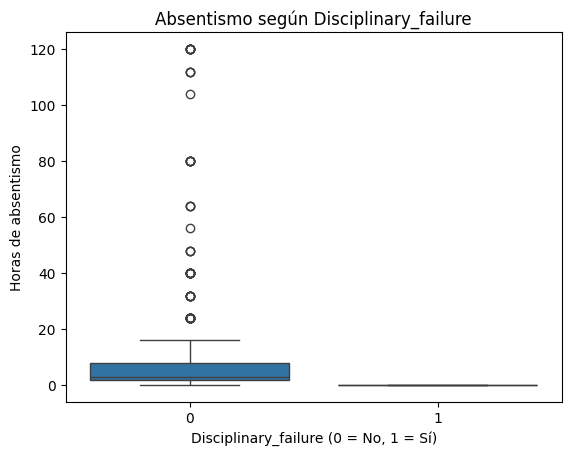

In [10]:
# Agrupación y media
df_RRHH_clean.groupby('Disciplinary_failure')['Absenteeism_hours'].mean()

# Visualización
sns.boxplot(data=df_RRHH_clean, x='Disciplinary_failure', y='Absenteeism_hours')
plt.title('Absentismo según Disciplinary_failure')
plt.xlabel('Disciplinary_failure (0 = No, 1 = Sí)')
plt.ylabel('Horas de absentismo')
plt.show()

### Analisis Social_drinker

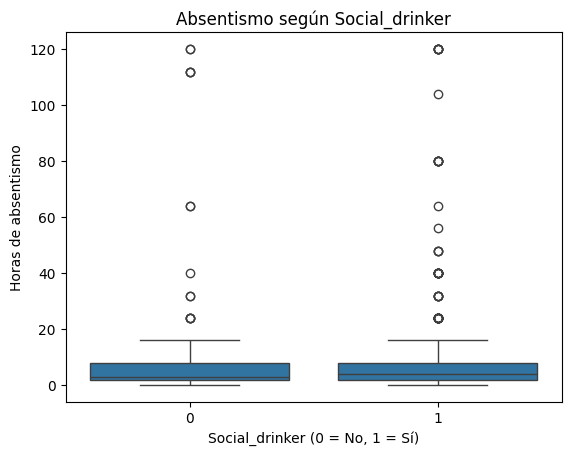

In [11]:
# Agrupación y media
df_RRHH_clean.groupby('Social_drinker')['Absenteeism_hours'].mean()

# Visualización
sns.boxplot(data=df_RRHH_clean, x='Social_drinker', y='Absenteeism_hours')
plt.title('Absentismo según Social_drinker')
plt.xlabel('Social_drinker (0 = No, 1 = Sí)')
plt.ylabel('Horas de absentismo')
plt.show()

### Analisis Social_smoker

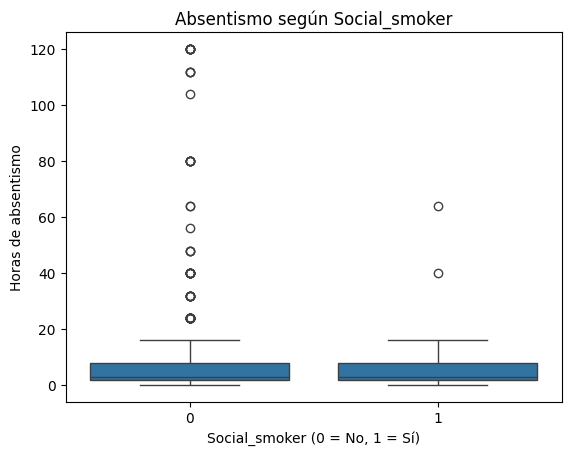

In [12]:
# Agrupación y media
df_RRHH_clean.groupby('Social_smoker')['Absenteeism_hours'].mean()

# Visualización
sns.boxplot(data=df_RRHH_clean, x='Social_smoker', y='Absenteeism_hours')
plt.title('Absentismo según Social_smoker')
plt.xlabel('Social_smoker (0 = No, 1 = Sí)')
plt.ylabel('Horas de absentismo')
plt.show()

### Regresion lineal solo Disciplinary_failure

In [13]:
# Seleccionamos las variables de interés
X = df_RRHH_clean[['Disciplinary_failure']]
y = df_RRHH_clean['Absenteeism_hours']

# Añadimos constante para el modelo (intercepto)
X = sm.add_constant(X)

# Ajustamos el modelo de regresión lineal
modelo = sm.OLS(y, X).fit()

# Mostramos resumen de resultados
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:      Absenteeism_hours   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     13.60
Date:                Wed, 02 Jul 2025   Prob (F-statistic):           0.000237
Time:                        09:23:56   Log-Likelihood:                -4460.9
No. Observations:                1087   AIC:                             8926.
Df Residuals:                    1085   BIC:                             8936.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    7.6899 

### Regresion lineal Disciplinary_failure con Social_drinker y Social_smoker

In [14]:
# Seleccionamos las variables de interés
X = df_RRHH_clean[['Social_drinker', 'Social_smoker', 'Disciplinary_failure']]
y = df_RRHH_clean['Absenteeism_hours']

# Añadimos constante para el modelo (intercepto)
X = sm.add_constant(X)

# Ajustamos el modelo de regresión lineal
modelo = sm.OLS(y, X).fit()

# Mostramos resumen de resultados
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:      Absenteeism_hours   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     7.649
Date:                Wed, 02 Jul 2025   Prob (F-statistic):           4.63e-05
Time:                        09:24:01   Log-Likelihood:                -4456.3
No. Observations:                1087   AIC:                             8921.
Df Residuals:                    1083   BIC:                             8941.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    6.1518 

### Grafico regresion lineal

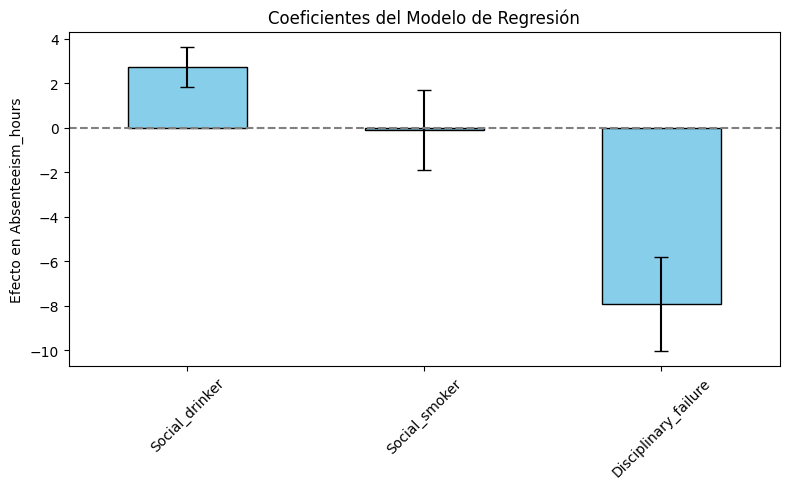

In [15]:
# Variables del modelo
X = df_RRHH_clean[['Social_drinker', 'Social_smoker', 'Disciplinary_failure']]
y = df_RRHH_clean['Absenteeism_hours']
X = sm.add_constant(X)

# Ajustar el modelo
modelo = sm.OLS(y, X).fit()

# Extraer coeficientes
coef = modelo.params
errors = modelo.bse

# Graficar coeficientes
plt.figure(figsize=(8, 5))
coef[1:].plot(kind='bar', yerr=errors[1:], capsize=5, color='skyblue', edgecolor='black')
plt.title('Coeficientes del Modelo de Regresión')
plt.ylabel('Efecto en Absenteeism_hours')
plt.xticks(rotation=45)
plt.axhline(0, color='gray', linestyle='--')
plt.tight_layout()
plt.show()

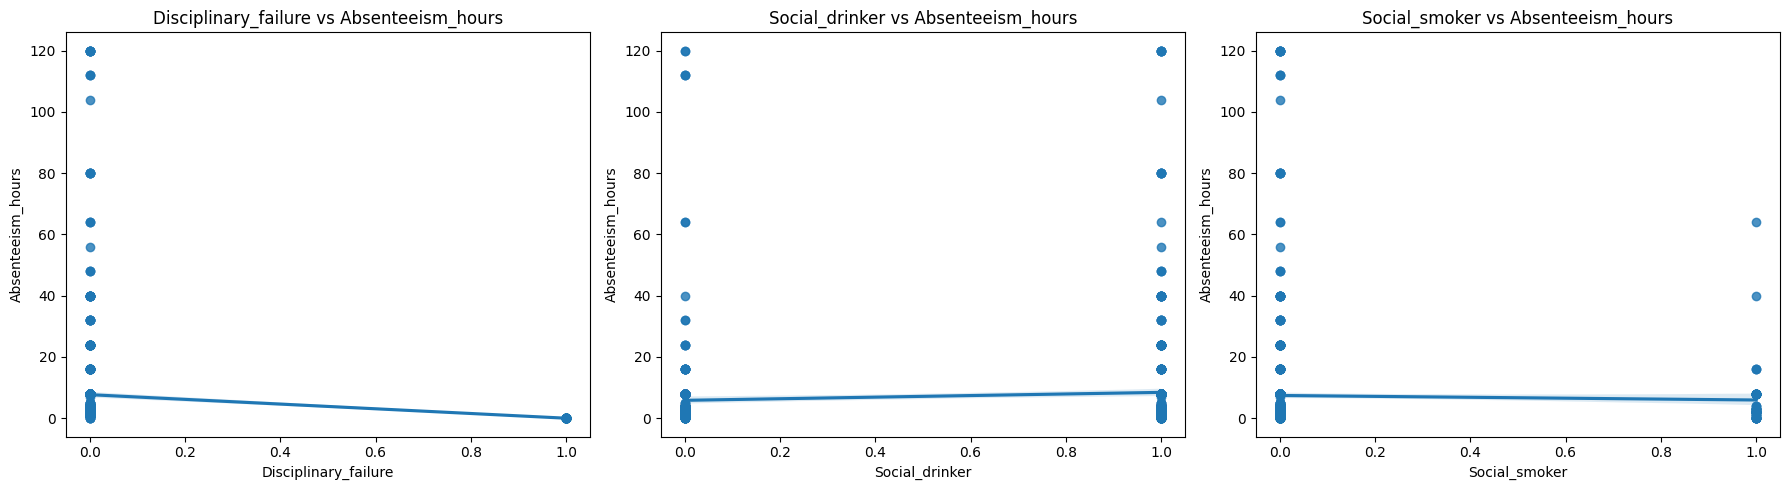

In [16]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

variables = ['Disciplinary_failure', 'Social_drinker', 'Social_smoker']
for i, var in enumerate(variables):
    sns.regplot(x=var, y='Absenteeism_hours', data=df_RRHH_clean, logistic=False, ax=axs[i])
    axs[i].set_title(f'{var} vs Absenteeism_hours')

plt.tight_layout()
plt.show()

C:\Users\santy\AppData\Local\Temp\ipykernel_27600\2617912249.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


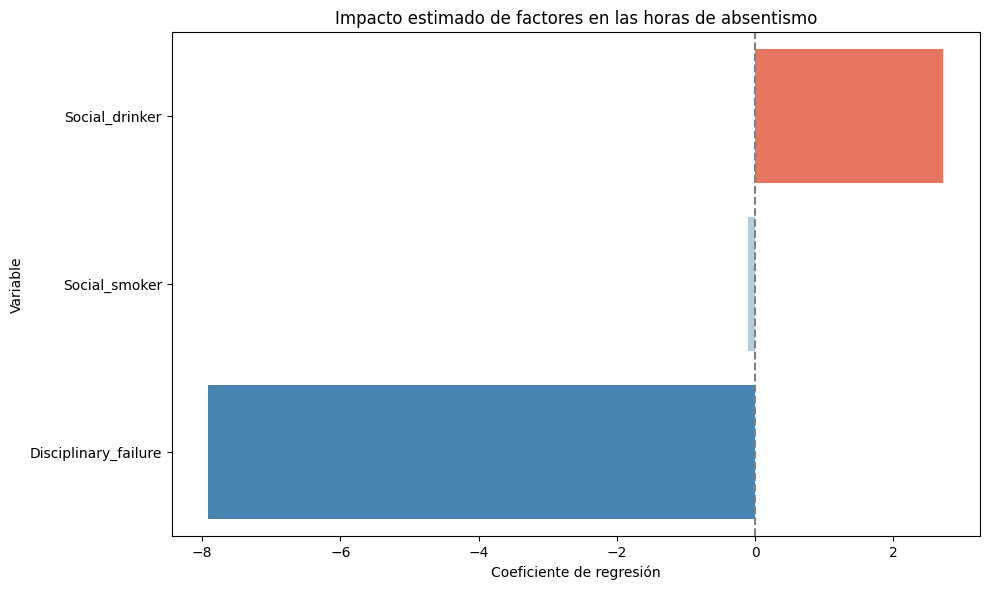

In [20]:
# 1. Preparar los datos y modelo
X = df_RRHH_clean[['Social_drinker', 'Social_smoker', 'Disciplinary_failure']]
y = df_RRHH_clean['Absenteeism_hours']
X = sm.add_constant(X)
modelo = sm.OLS(y, X).fit()

# 2. Extraer coeficientes
summary_df = modelo.summary2().tables[1]
coef_series = summary_df['Coef.']

# 3. Reordenar manualmente: social_drinker, social_smoker, disciplinary_failure
ordered_vars = coef_series.loc[['Social_drinker', 'Social_smoker', 'Disciplinary_failure']]

# 4. Asignar colores según signo (rojo degradado para positivos, azul para negativos)
colors = []
reds = sns.color_palette("Reds", sum(ordered_vars > 0))[::-1]
blues = sns.color_palette("Blues", sum(ordered_vars < 0))
for coef in ordered_vars:
    if coef > 0:
        colors.append(reds.pop(0))
    else:
        colors.append(blues.pop(0))

# 5. Crear gráfico
plt.figure(figsize=(10, 6))
sns.barplot(
    y=ordered_vars.index,
    x=ordered_vars.values,
    palette=colors,
    orient='h'
)

plt.axvline(0, color='gray', linestyle='--')
plt.title('Impacto estimado de factores en las horas de absentismo')
plt.xlabel('Coeficiente de regresión')
plt.ylabel('Variable')
plt.tight_layout()
plt.show()

### Graficos datos generales

C:\Users\santy\AppData\Local\Temp\ipykernel_27600\3554689235.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


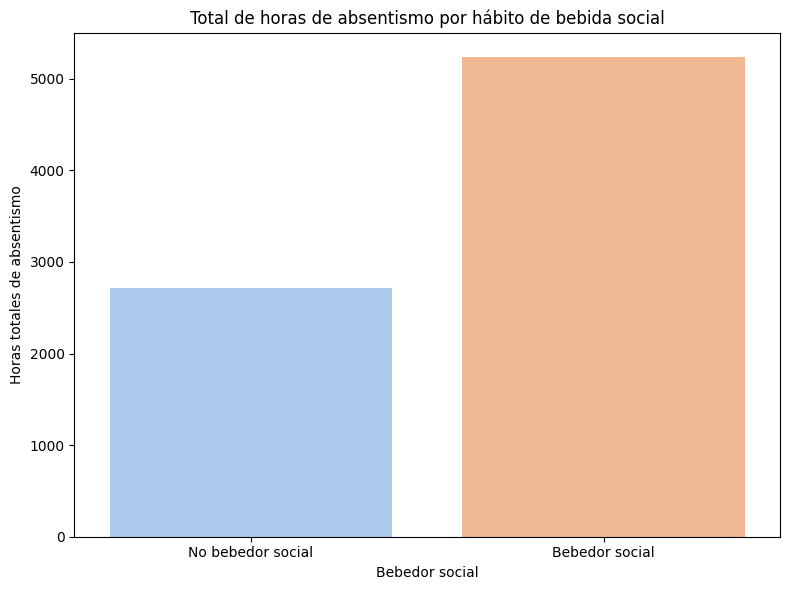

In [21]:
# Agrupar datos: suma de horas de absentismo por categoría de Social_drinker
df_grouped = df_RRHH_clean.groupby('Social_drinker')['Absenteeism_hours'].sum().reset_index()

# Convertir 0/1 a etiquetas si quieres legibilidad
df_grouped['Social_drinker'] = df_grouped['Social_drinker'].map({0: 'No bebedor social', 1: 'Bebedor social'})

# Crear gráfico
plt.figure(figsize=(8, 6))
sns.barplot(
    data=df_grouped,
    x='Social_drinker',
    y='Absenteeism_hours',
    palette='pastel'
)

plt.title('Total de horas de absentismo por hábito de bebida social')
plt.xlabel('Bebedor social')
plt.ylabel('Horas totales de absentismo')
plt.tight_layout()
plt.show()

C:\Users\santy\AppData\Local\Temp\ipykernel_27600\3574034317.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


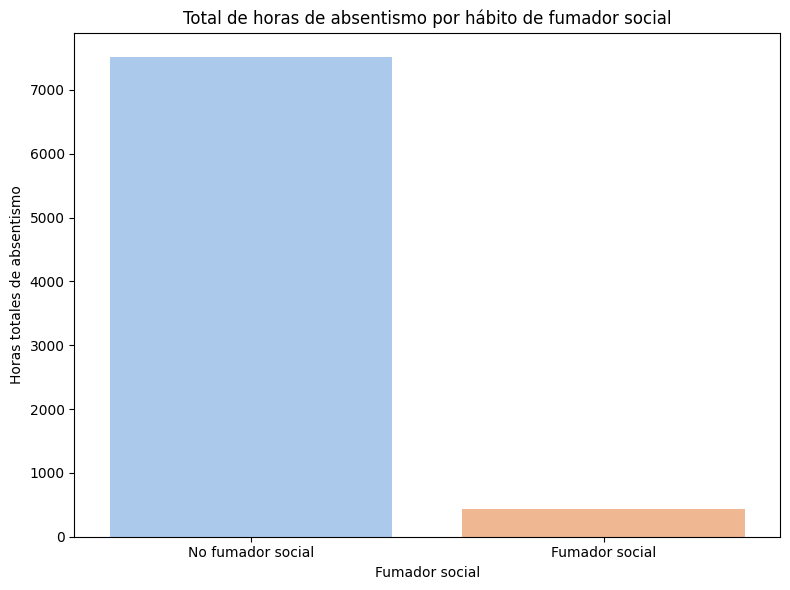

In [22]:
# Agrupar datos: suma de horas de absentismo por categoría de Social_smoker
df_grouped = df_RRHH_clean.groupby('Social_smoker')['Absenteeism_hours'].sum().reset_index()

# Convertir 0/1 a etiquetas si quieres legibilidad
df_grouped['Social_smoker'] = df_grouped['Social_smoker'].map({0: 'No fumador social', 1: 'Fumador social'})

# Crear gráfico
plt.figure(figsize=(8, 6))
sns.barplot(
    data=df_grouped,
    x='Social_smoker',
    y='Absenteeism_hours',
    palette='pastel'
)

plt.title('Total de horas de absentismo por hábito de fumador social')
plt.xlabel('Fumador social')
plt.ylabel('Horas totales de absentismo')
plt.tight_layout()
plt.show()

C:\Users\santy\AppData\Local\Temp\ipykernel_27600\3919852380.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


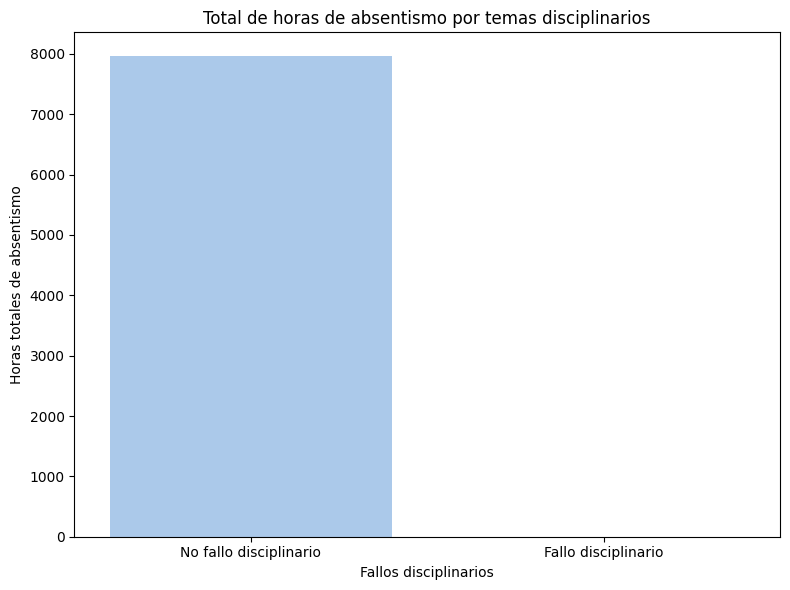

In [23]:
# Agrupar datos: suma de horas de absentismo por categoría de Disciplinary_failure
df_grouped = df_RRHH_clean.groupby('Disciplinary_failure')['Absenteeism_hours'].sum().reset_index()

# Convertir 0/1 a etiquetas si quieres legibilidad
df_grouped['Disciplinary_failure'] = df_grouped['Disciplinary_failure'].map({0: 'No fallo disciplinario', 1: 'Fallo disciplinario'})

# Crear gráfico
plt.figure(figsize=(8, 6))
sns.barplot(
    data=df_grouped,
    x='Disciplinary_failure',
    y='Absenteeism_hours',
    palette='pastel'
)

plt.title('Total de horas de absentismo por temas disciplinarios')
plt.xlabel('Fallos disciplinarios')
plt.ylabel('Horas totales de absentismo')
plt.tight_layout()
plt.show()